### Simple Linear Regression. Minimal example

#### Import the relevant libraries

In [1]:
# numPy contains all the mathematical operations that you need, and is extremely fast.
import numpy as np
# to plot data (nice graphs)
import matplotlib.pyplot as plt
# nice 3D graphs
from mpl_toolkits.mplot3d import Axes3D 


#### Generate random input data to train on

f(x,z) = a*x + b*z + c

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1)) # size = 1000 x 2
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


#### Create the targets we will aim at

The algorithm must LEARN this the function

targets = f(x,z) = 2*x - 3*z + 5 + noise

In [3]:
noise = np.random.uniform(-1,-1,(observations, 1))

targets = 2*xs - 3*zs + noise

print(targets.shape)

(1000, 1)


#### Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

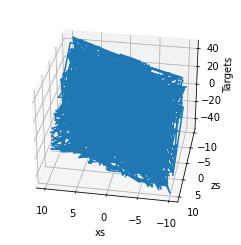

In [4]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)
plt.show() # in 2D shows a liner model, in 3D it shows a plane

targets = targets.reshape(observations, 1)
xs = xs.reshape(observations, 1)
zs = zs.reshape(observations, 1)

#### Initialize variables

In [5]:
init_range = 0.1

# our initial weights and biases will be picked randomly from the interval [-0.1, 0.1]
weights = np.random.uniform(-init_range, init_range, size=(2,1)) # vector 2x1

biases = np.random.uniform(-init_range, init_range, size=1) # scalar 1x1

print(weights)
print(biases)

[[-0.07105662]
 [-0.07140874]]
[0.00238359]


#### Set a learning rate (eta)

In [6]:
learning_rate = 0.02

#### Train the model

In [9]:
for i in range(100):
    # Calculate outputs
    outputs = np.dot(inputs, weights) + biases
    # 1000x1         1000x2  2x1        scalar      Python adds scalar to matrices element-wise. That's exactly what we want
    deltas = outputs - targets

    # Compare outputs to targets through the loss
    #   we divide by 2 to get the elegant update rules for the gradient decent
    #   to augment the loss we divide it by the number of observations we have
    #   This will give us the average loss per observation or mean loss
    loss = np.sum(deltas ** 2) / 2 / observations
    # this improvements makes the learing independent of the number of observations

    # Print the loss, to check if it is decreasing
    print(loss)

    deltas_scaled = deltas / observations

    # Adjust weights and biases
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    # 2x1       2x1         scalar             2x1000       1000x1
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.009547241429948568
0.009171207875910635
0.008809985011934408
0.008462989495023429
0.008129660958089608
0.007809461105009063
0.007501872841322264
0.007206399439171315
0.006922563735129355
0.00664990735962285
0.006387989996706147
0.006136388672989207
0.005894697074573798
0.005662524890891977
0.005439497184389191
0.005225253785033195
0.005019448708671225
0.004821749598296613
0.004631837187320954
0.004449404783987187
0.004274157776089394
0.004105813155200311
0.003944099059637337
0.003788754335430381
0.0036395281145809003
0.0034961794099327343
0.003358476725998576
0.003226197685115678
0.003099128668325443
0.0029770644703974326
0.0028598079684416847
0.002747169803571741
0.0026389680751079093
0.0025350280468225306
0.0024351818647576
0.002339268286154634
0.002247132419061992
0.002158625472198504
0.0020736045146681256
0.00199193224513968
0.0019134767701170653
0.0018381113909428334
0.0017657143991913337
0.0016961688801201099
0.0016293625238631697
0.001565187444060289
0.0015035400036300423
0.00

##### We have minimized the loss with respect to the weights and biases

we have found a linear function that fits the model well.

The variables: weights, biases and outputs contain their optimized values: those from the last iteration of the loop.

#### Print weights and biases and see if we have worked correctly.

In [10]:
print(weights, biases)

[[ 2.0000615 ]
 [-2.99976007]] [-0.98142058]


Play around with the code for homework. Try different:
  1) number of observations
  2) learning rate
  3) number of iterations
  4) initial range for initializing weights and  biases

#### Plots last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.

The closer this plot is to a 45 degree line, the closer target and output values are.

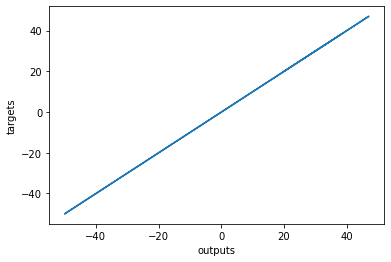

In [11]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()